In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/ZINA/Desktop/IRONHACK/Week_4/first_project/data/clean/CleanStars.csv")
print(df.head())

                                               name  year       city  \
0                                       ho hung kee  2019  Hong Kong   
1                                       feng wei ju  2019      Macau   
2  imperial treasure fine teochew cuisine (orchard)  2018  Singapore   
3                                     shisen hanten  2018  Singapore   
4                                        ma cuisine  2018  Singapore   

      region  cuisine price  \
0  Hong Kong  chinese     $   
1      Macau  chinese     $   
2  Singapore  chinese     $   
3  Singapore  chinese     $   
4  Singapore   french     $   

                                                 url    stars major_city  
0  https://guide.michelin.com/hk/en/hong-kong-reg...   1 star  Hong Kong  
1  https://guide.michelin.com/mo/en/macau-region/...  2 stars      Macau  
2  https://guide.michelin.com/sg/en/singapore-reg...   1 star  Singapore  
3  https://guide.michelin.com/sg/en/singapore-reg...  2 stars  Singapore  
4  ht

In [2]:
# many restaurants belong to each price range:
price_count = df.groupby("price")["name"].count()
print(price_count)

price
$        31
$$       75
$$$     143
$$$$    270
Name: name, dtype: int64


In [18]:
print(df.columns)

Index(['name', 'year', 'city', 'region', 'cuisine', 'price', 'url', 'stars',
       'major_city', 'stars_num', 'price_num'],
      dtype='object')


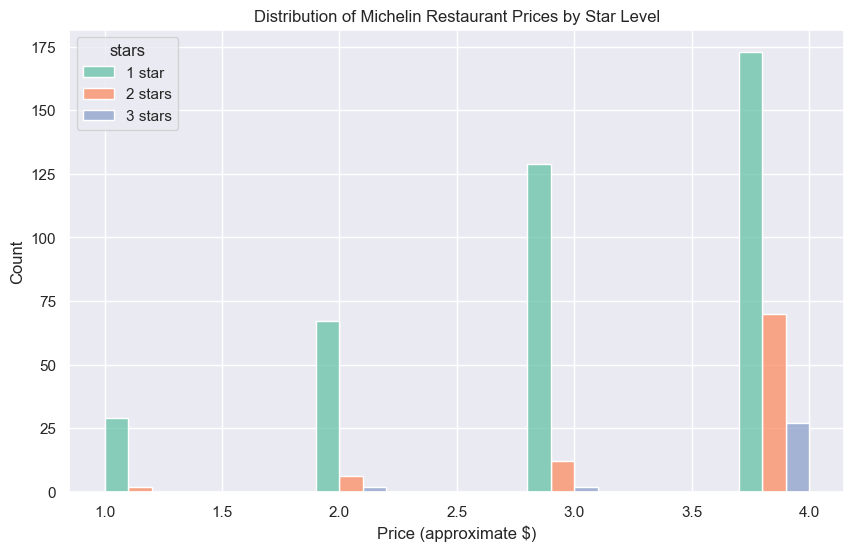

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='price_num',
    hue='stars',
    multiple='dodge',
    bins=10,
    palette='Set2'
)
plt.title('Distribution of Michelin Restaurant Prices by Star Level')
plt.xlabel('Price (approximate $)')
plt.ylabel('Count')
plt.show()


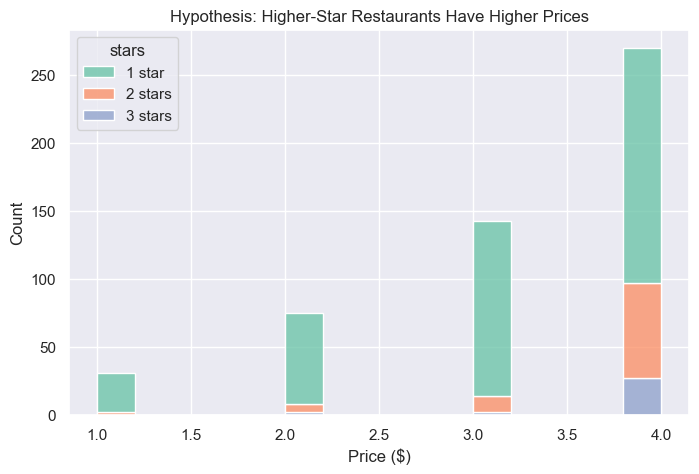

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price_num', hue='stars', bins=15, palette='Set2', multiple='stack')
plt.title('Hypothesis: Higher-Star Restaurants Have Higher Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\288159808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stars', palette='Set2')


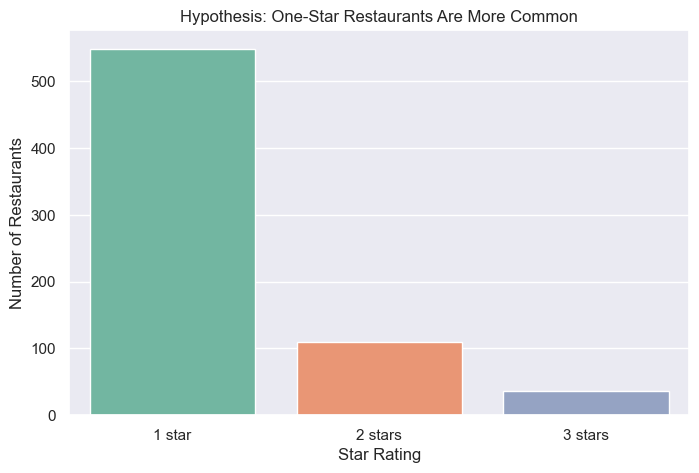

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='stars', palette='Set2')
plt.title('Hypothesis: One-Star Restaurants Are More Common')
plt.xlabel('Star Rating')
plt.ylabel('Number of Restaurants')
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\3586425634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='price_num', palette='Set2')


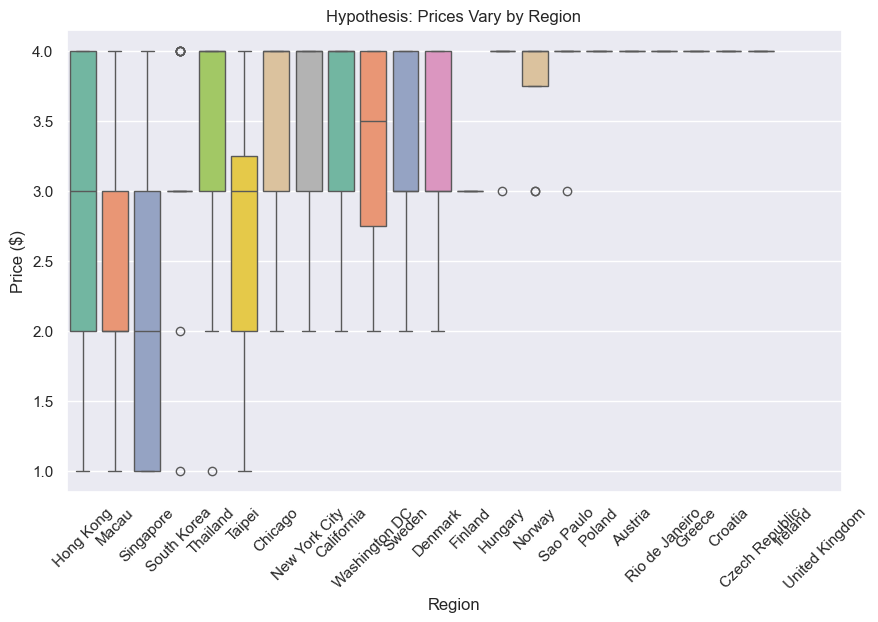

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='region', y='price_num', palette='Set2')
plt.title('Hypothesis: Prices Vary by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\1948608525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cuisine', y='price_num', palette='Set1')


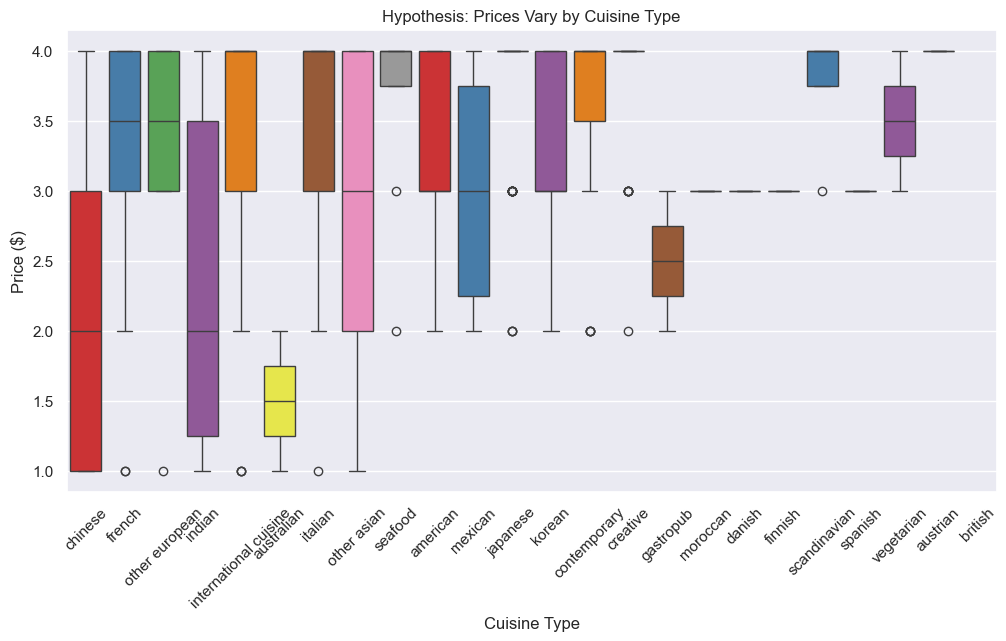

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cuisine', y='price_num', palette='Set1')
plt.title('Hypothesis: Prices Vary by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\287801151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Set2')


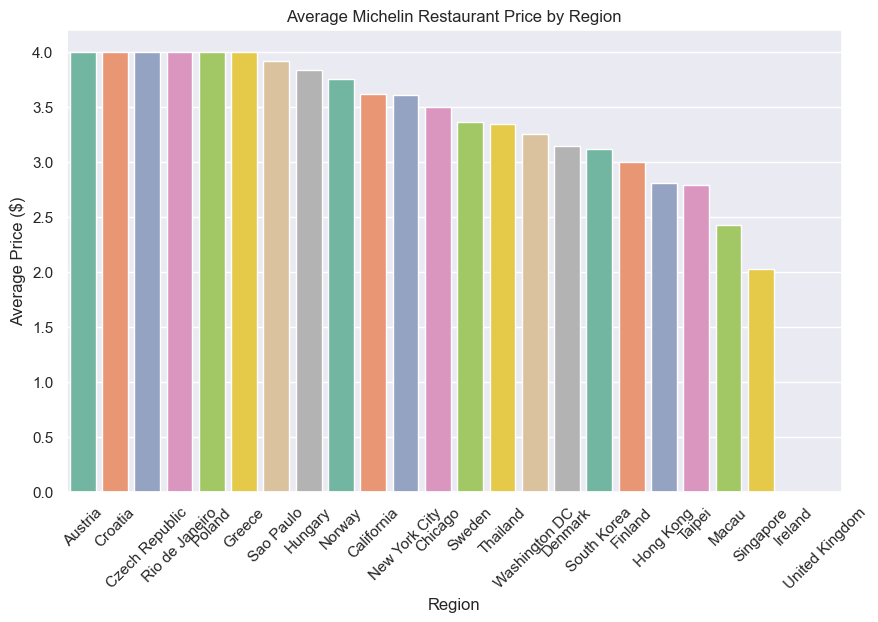

In [32]:
# Calculate average price per region
avg_price_region = df.groupby('region')['price_num'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Set2')
plt.title('Average Michelin Restaurant Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\1313849615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cuisine.index, y=avg_price_cuisine.values, palette='Set3')


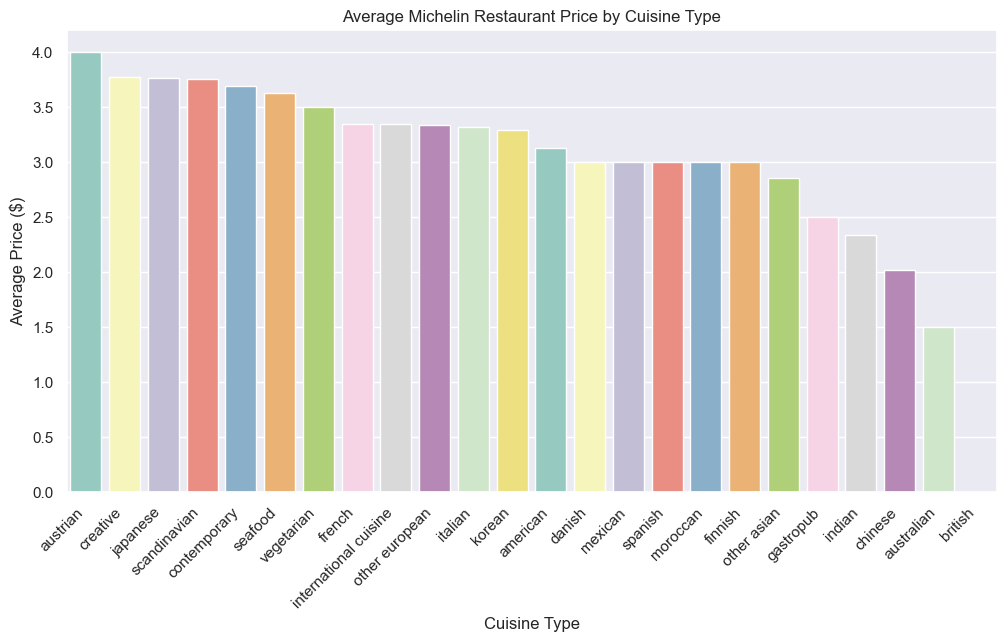

In [33]:
# Calculate average price per cuisine
avg_price_cuisine = df.groupby('cuisine')['price_num'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_cuisine.index, y=avg_price_cuisine.values, palette='Set3')
plt.title('Average Michelin Restaurant Price by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


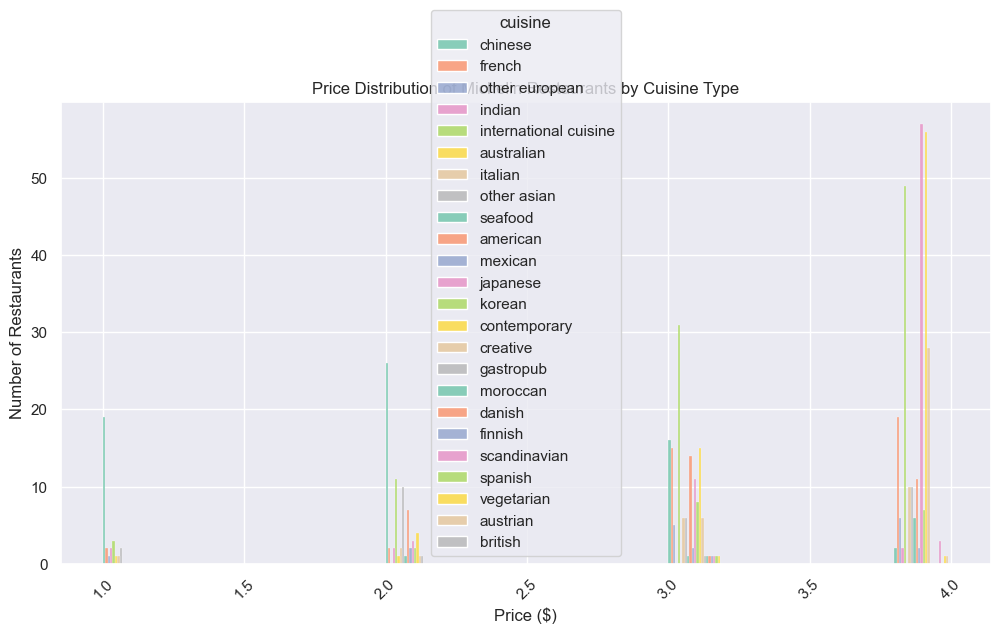

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df, 
    x='price_num', 
    hue='cuisine', 
    multiple='dodge', 
    bins=15, 
    palette='Set2'
)
plt.title('Price Distribution of Michelin Restaurants by Cuisine Type')
plt.xlabel('Price ($)')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_12444\3677938649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


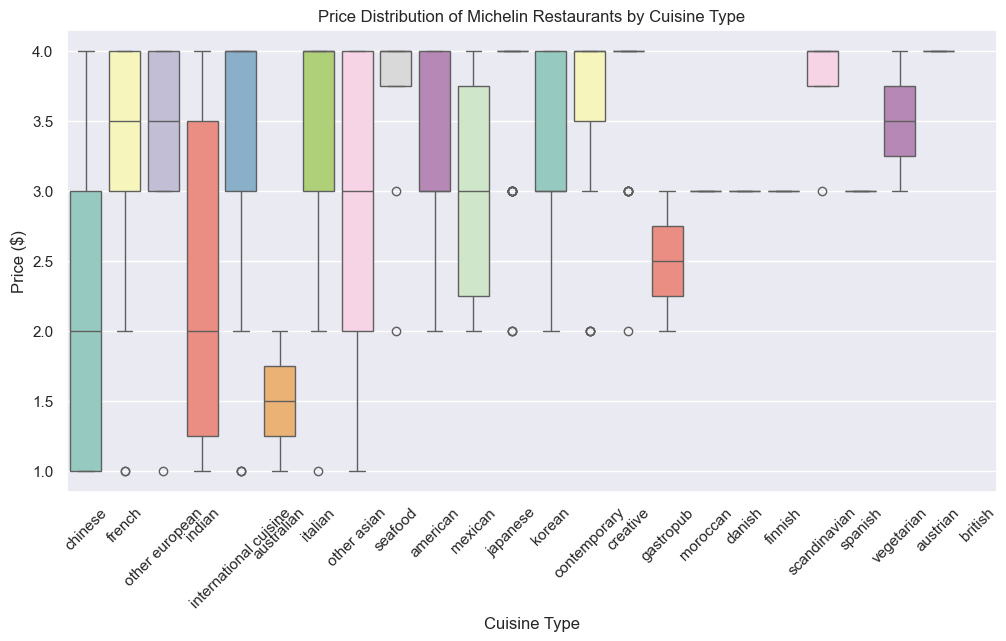

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df, 
    x='cuisine', 
    y='price_num', 
    palette='Set3'
)
plt.title('Price Distribution of Michelin Restaurants by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='price_mean', hue='stars', palette='Set2')
plt.title('Distribution of Michelin Restaurant Prices by Star Level')
plt.xlabel('Price')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `price_mean` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region', hue='price', palette='Set3')
plt.title('Price Distribution of Michelin Restaurants by Region')
plt.xlabel('Region')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1000x600 with 1 Axes>